In [1]:
! mv /mnt/c/Users/ldhag/Downloads/COVID-19_Daily_Surveillance_Data_Public.csv .

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
%matplotlib inline

In [3]:
df_sa = pd.read_csv('COVID-19_Daily_Surveillance_Data_Public.csv')

In [4]:
df_sa.tail()

,X,Y,objectid,globalid,reporting_date,total_case_daily_change,total_case_cumulative,deaths_daily_change,deaths_cumulative,strac_covid_positive_in_hospita,strac_covid_positive_in_icu,strac_covid_positive_on_ventila,strac_total_ventilators,strac_available_ventilators,strac_total_staffed_beds,strac_available_staffed_beds,count_7_day_moving_avg,change_in_7_day_moving_avg,deaths_under_investigation
584,0.0,0.0,594,3f0c9c77-3df1-4ba7-8226-8f8121433fbd,2021/09/19 17:00:00+00,697.0,304344.0,0.0,4171,867.0,307.0,214.0,817.0,401.0,4232.0,532.0,836.0,4.0,NaN
585,0.0,0.0,595,dc063004-27cc-4cb0-80cc-9cd6b0a3380f,2021/09/20 17:00:00+00,138.0,304934.0,0.0,4171,883.0,311.0,197.0,815.0,393.0,4163.0,488.0,713.0,-123.0,NaN
586,0.0,0.0,596,4dde5925-69db-40c3-8651-55440826c9cf,2021/09/21 17:00:00+00,344.0,305278.0,1.0,4282,868.0,314.0,196.0,812.0,375.0,4228.0,365.0,652.0,-61.0,NaN
587,0.0,0.0,597,46f6d168-217c-42ab-889e-33fe44a59ffa,2021/09/22 17:00:00+00,920.0,306198.0,10.0,4292,846.0,300.0,187.0,812.0,392.0,4271.0,392.0,618.0,-34.0,NaN
588,0.0,0.0,598,82653627-5f64-45c1-88a3-982b67d4a3e0,2021/09/23 17:00:00+00,571.0,306769.0,22.0,4314,820.0,289.0,158.0,816.0,396.0,4232.0,402.0,595.0,-23.0,NaN


In [5]:
type(df_sa.loc[:,'reporting_date'][400])

str

In [6]:
df_sa.reporting_date = pd.to_datetime(df_sa.reporting_date)

In [7]:
type(df_sa.loc[:,'reporting_date'][400])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
df_sa_dtindex = df_sa.set_index('reporting_date')

In [9]:
df_sa.reporting_date[0]

Timestamp('2020-02-12 06:00:00+0000', tz='UTC')

In [10]:
df_newcases = df_sa_dtindex.loc[:,['total_case_daily_change']]

In [11]:
df_newcases_7day_moving= df_newcases.rolling(7).mean().shift()

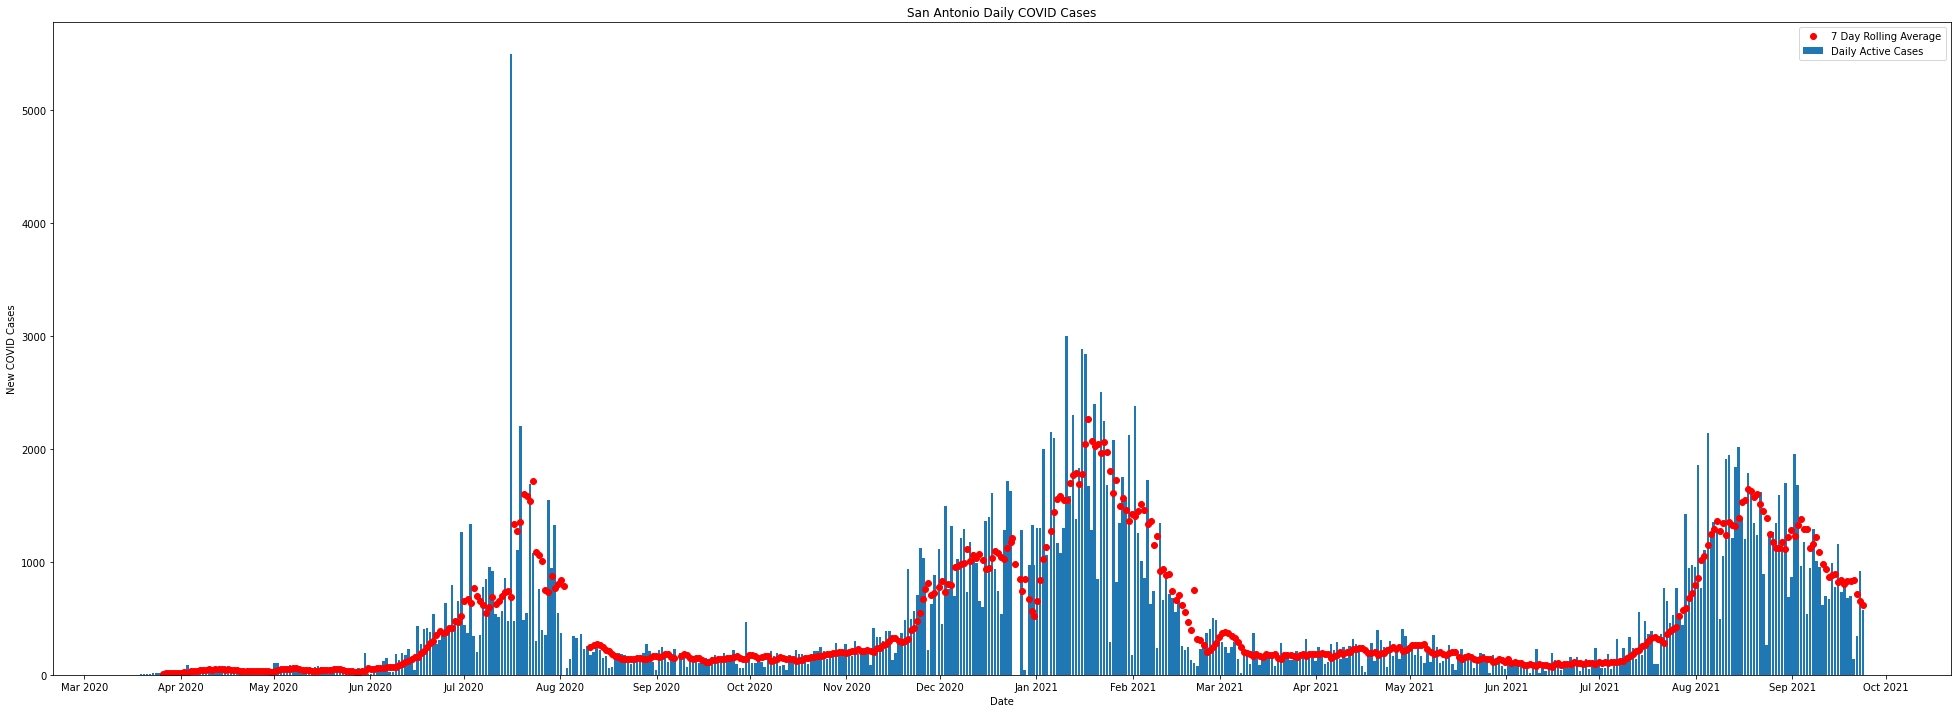

In [12]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(34,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID Cases')
plt.xlabel('Date',color='black')
plt.ylabel('New COVID Cases',color='black')
plt.bar(df_newcases.index,df_newcases.total_case_daily_change)
plt.plot(df_newcases_7day_moving, 'ro')
plt.legend(['7 Day Rolling Average','Daily Active Cases'])
fig.savefig('MetroDailySANew.png')

In [13]:
df_sa_covid_icu = df_sa_dtindex.loc[:,['strac_covid_positive_in_icu']]

In [14]:
df_sa_covid_icu

,strac_covid_positive_in_icu
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
...,...
2021-09-19 17:00:00+00:00,307.0
2021-09-20 17:00:00+00:00,311.0
2021-09-21 17:00:00+00:00,314.0


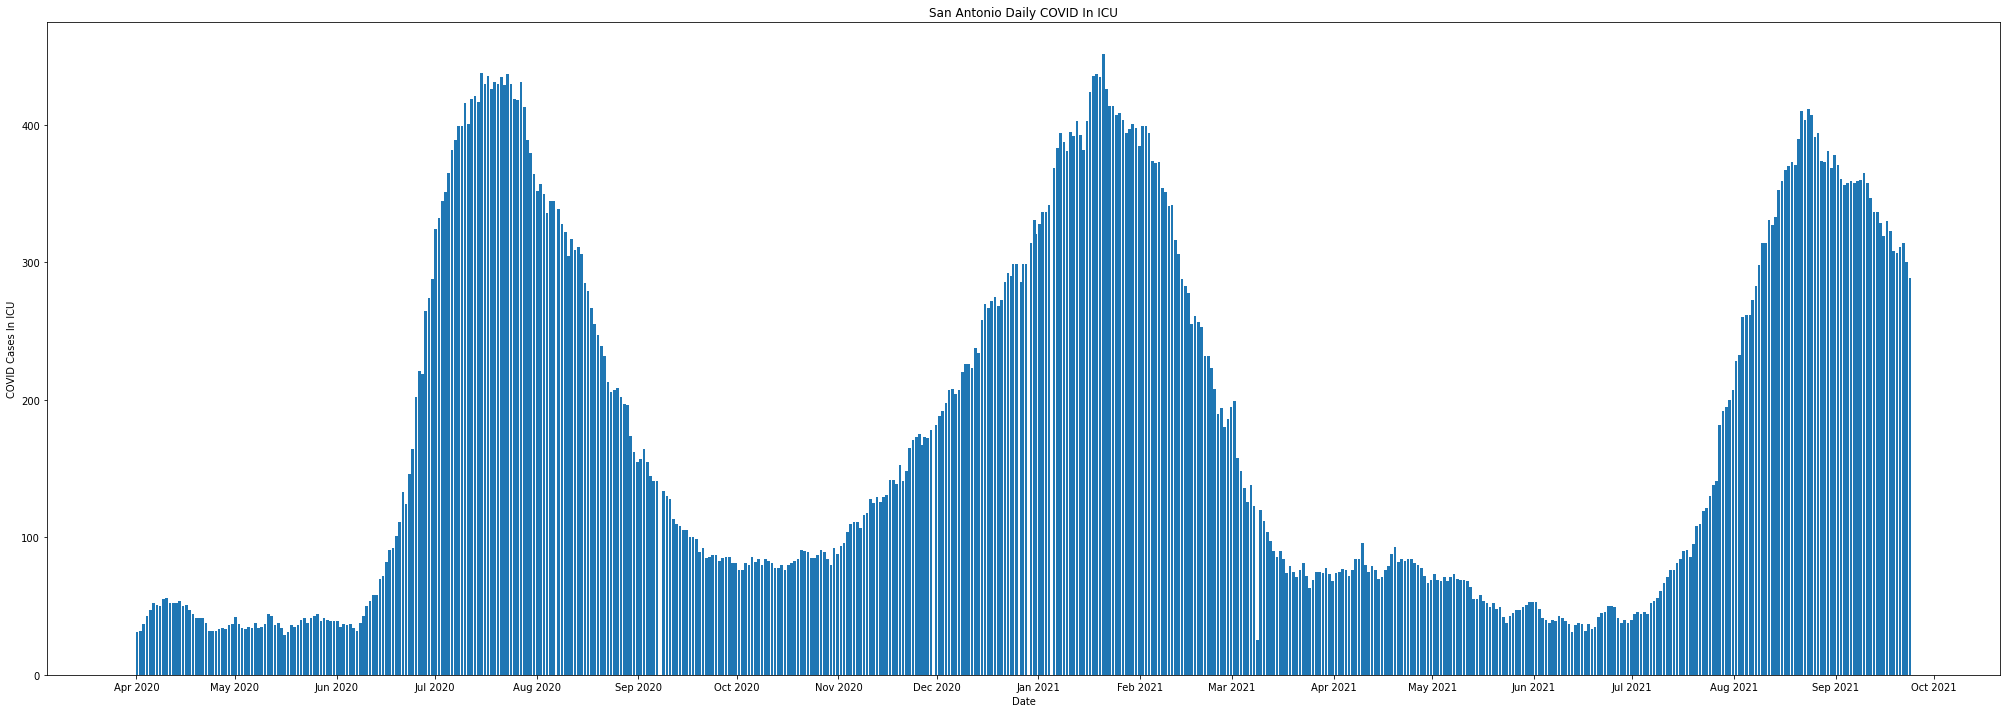

In [15]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID In ICU')
plt.xlabel('Date',color='black')
plt.ylabel('COVID Cases In ICU',color='black')
plt.bar(df_sa_covid_icu.index,df_sa_covid_icu.strac_covid_positive_in_icu)
fig.savefig('MetroICUSANew.png')

In [16]:
df_sa_deaths = df_sa_dtindex.loc[:,['deaths_daily_change']]

In [17]:
df_sa_deaths_7day_moving= df_sa_deaths.rolling(7).mean().shift()

In [18]:
df_sa_deaths

,deaths_daily_change
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
...,...
2021-09-19 17:00:00+00:00,0.0
2021-09-20 17:00:00+00:00,0.0
2021-09-21 17:00:00+00:00,1.0


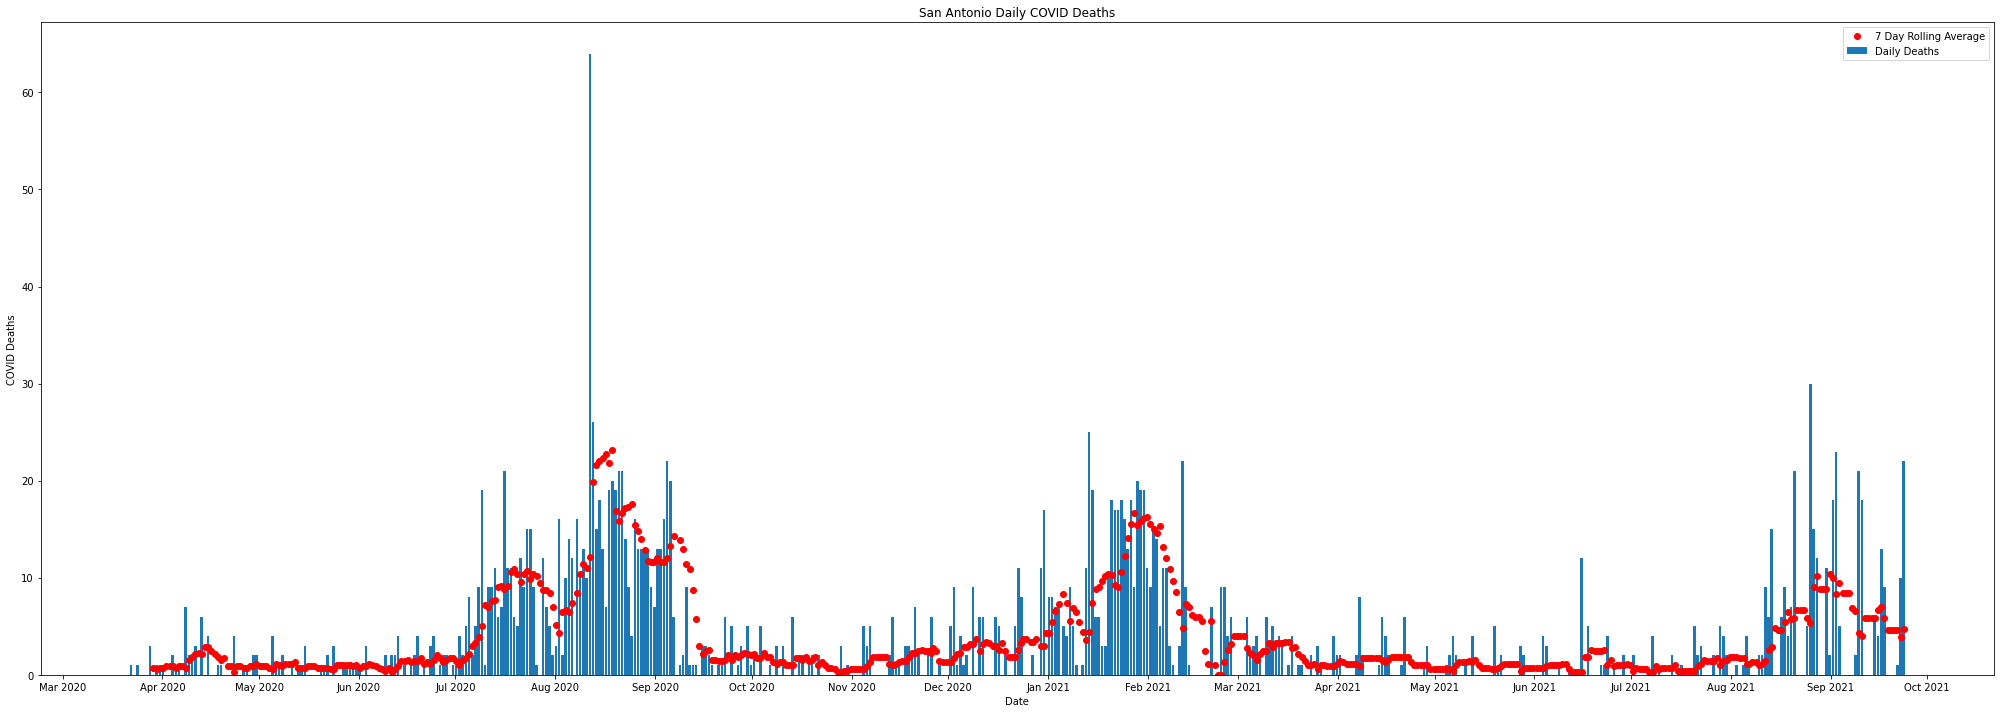

In [19]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID Deaths')
plt.xlabel('Date',color='black')
plt.ylabel('COVID Deaths',color='black')
plt.bar(df_sa_deaths.index,df_sa_deaths.deaths_daily_change)
plt.plot(df_sa_deaths_7day_moving, 'ro')
plt.legend(['7 Day Rolling Average','Daily Deaths'])
fig.savefig('MetroDeathsSANew.png')

In [20]:
df_sa_deaths.index[-60:]

DatetimeIndex(['2021-07-26 17:00:00+00:00', '2021-07-27 17:00:00+00:00',
               '2021-07-28 17:00:00+00:00', '2021-07-29 17:00:00+00:00',
               '2021-07-30 17:00:00+00:00', '2021-07-31 17:00:00+00:00',
               '2021-08-01 17:00:00+00:00', '2021-08-02 17:00:00+00:00',
               '2021-08-03 17:00:00+00:00', '2021-08-04 23:00:00+00:00',
               '2021-08-05 23:00:00+00:00', '2021-08-06 17:00:00+00:00',
               '2021-08-09 17:00:00+00:00', '2021-08-07 17:00:00+00:00',
               '2021-08-08 17:00:00+00:00', '2021-08-10 17:00:00+00:00',
               '2021-08-11 17:00:00+00:00', '2021-08-12 17:00:00+00:00',
               '2021-08-13 17:00:00+00:00', '2021-08-14 17:00:00+00:00',
               '2021-08-15 17:00:00+00:00', '2021-08-16 17:00:00+00:00',
               '2021-08-17 17:00:00+00:00', '2021-08-18 17:00:00+00:00',
               '2021-08-19 17:00:00+00:00', '2021-08-20 17:00:00+00:00',
               '2021-08-21 17:00:00+00:00', '2021-0

In [21]:
df_sa_hospital = df_sa_dtindex.loc[:,['strac_covid_positive_in_hospita']]

In [22]:
df_sa_hospital

,strac_covid_positive_in_hospita
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
...,...
2021-09-19 17:00:00+00:00,867.0
2021-09-20 17:00:00+00:00,883.0
2021-09-21 17:00:00+00:00,868.0


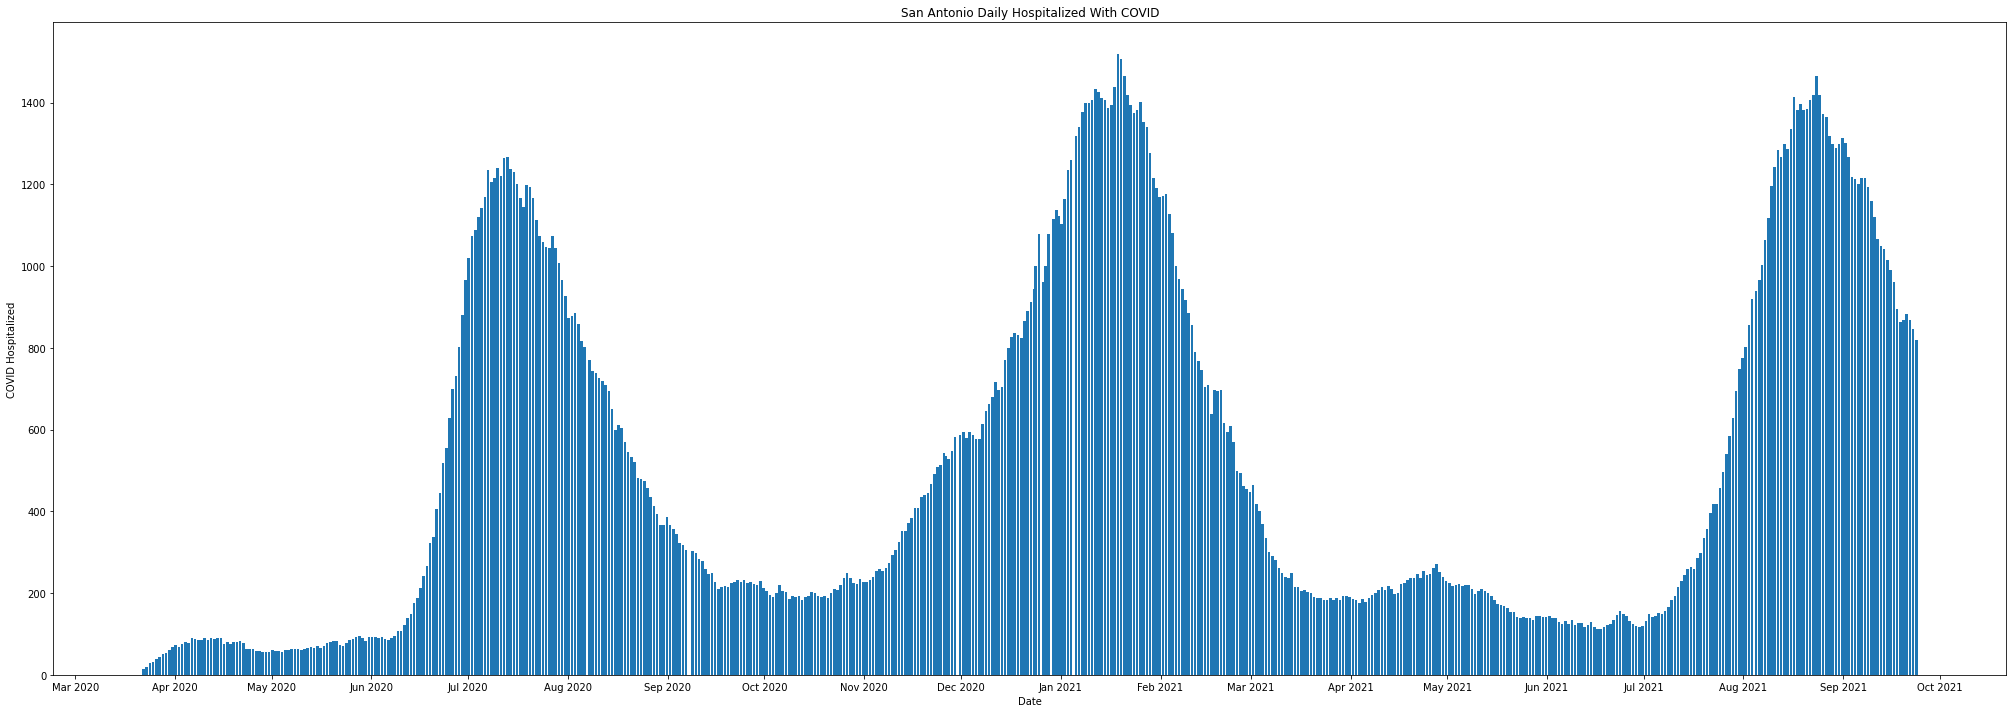

In [23]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily Hospitalized With COVID')
plt.xlabel('Date',color='black')
plt.ylabel('COVID Hospitalized',color='black')
plt.bar(df_sa_hospital.index,df_sa_hospital.strac_covid_positive_in_hospita)
fig.savefig('MetroHospitalSANew.png')

In [24]:
df_sa_availbeds = df_sa_dtindex.loc[:,['strac_available_staffed_beds']]

In [25]:
df_sa_availbeds

,strac_available_staffed_beds
reporting_date,
2020-02-12 06:00:00+00:00,NaN
2020-02-13 06:00:00+00:00,NaN
2020-02-14 06:00:00+00:00,NaN
2020-02-15 06:00:00+00:00,NaN
2020-02-16 06:00:00+00:00,NaN
...,...
2021-09-19 17:00:00+00:00,532.0
2021-09-20 17:00:00+00:00,488.0
2021-09-21 17:00:00+00:00,365.0


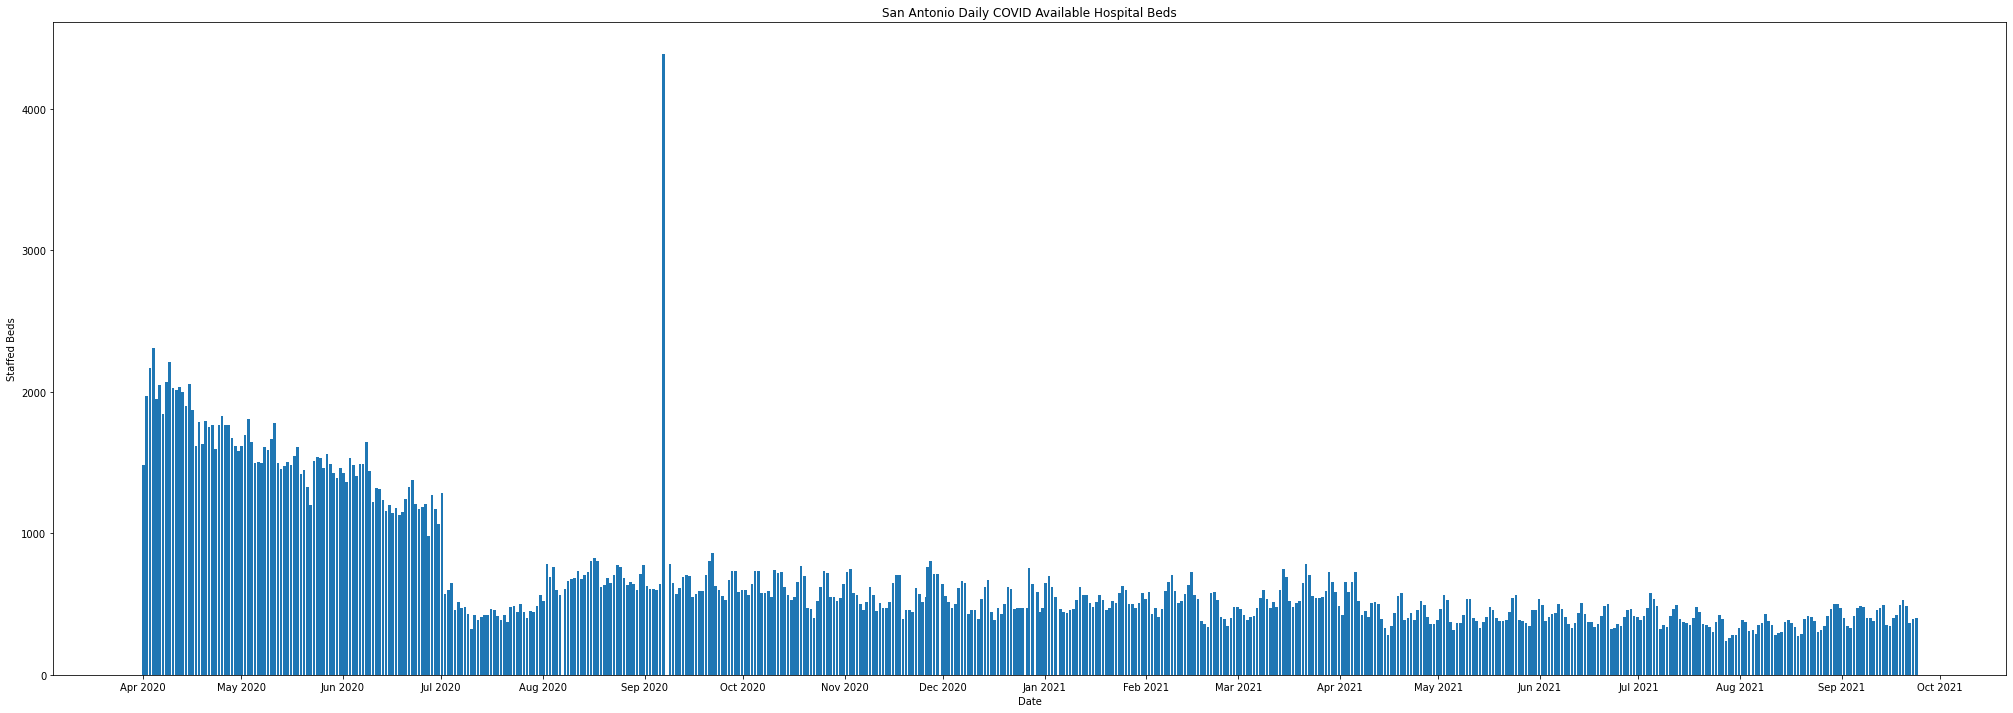

In [26]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(35,12)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
#ax.xaxis.set_minor_locator(months)
plt.title('San Antonio Daily COVID Available Hospital Beds')
plt.xlabel('Date',color='black')
plt.ylabel('Staffed Beds',color='black')
plt.bar(df_sa_availbeds.index,df_sa_availbeds.strac_available_staffed_beds)
fig.savefig('MetroAvailBedsSANew.png')